## Imports and notebook settings

In [1]:
# Notebook settings: IPython, Matplotlib 

from IPython.core.display import HTML
from IPython.core.interactiveshell import InteractiveShell
from IPython.display import set_matplotlib_formats

from matplotlib import pyplot as plt
import matplotlib

# Ipython: print multiple stuff on single cell and retina quality
InteractiveShell.ast_node_interactivity = "all"
set_matplotlib_formats('retina')

# Set ggplot style
plt.style.use('ggplot')
plt.xkcd();

matplotlib.rcParams.update({

    "lines.linewidth": 3.0,

    #"font.family": "serif",
    "font.size": 22,

    "xtick.labelsize": 12,
    "ytick.labelsize": 12,
    "axes.labelsize": 16,
    "axes.titlesize": 20,

    "figure.figsize": [15, 6],

})

In [2]:
from trump import TweetingTrump
from helpers import return_plottable_hist

import numpy as np

## Setting up

In [3]:
# Initialise the class, reading the downloaded tweets

t = TweetingTrump('tweets/')

## Meta infos on the tweets

In [4]:
infos = t.give_me_tweets_infos()

infos

{'languages_counts': {'de': 2,
  'en': 4726,
  'es': 1,
  'et': 2,
  'fr': 1,
  'in': 1,
  'ja': 2,
  'pl': 1,
  'pt': 1,
  'und': 93,
  'vi': 1},
 'max_date': datetime.datetime(2018, 1, 31, 2, 0, 2),
 'min_date': datetime.datetime(2016, 6, 2, 4, 58, 34),
 'num_quoted': 108,
 'num_tweets': 4831,
 'timespan_days': 607}

In [5]:
# Manually see some tweets in langs other than English

for tweet in t.tweets:
    if tweet['lang'] == 'es':
        print tweet['text'], tweet['lang']
        print '\n'

SyntaxError: Missing parentheses in call to 'print'. Did you mean print(print tweet['text'], tweet['lang'])? (<ipython-input-5-216324a42243>, line 5)

## Tweeting prolificity per day and per hour of day

In [141]:
time_prolificity = t.measure_time_prolificity()

day_numtweets = time_prolificity[0]
hour_numtweets = time_prolificity[1]

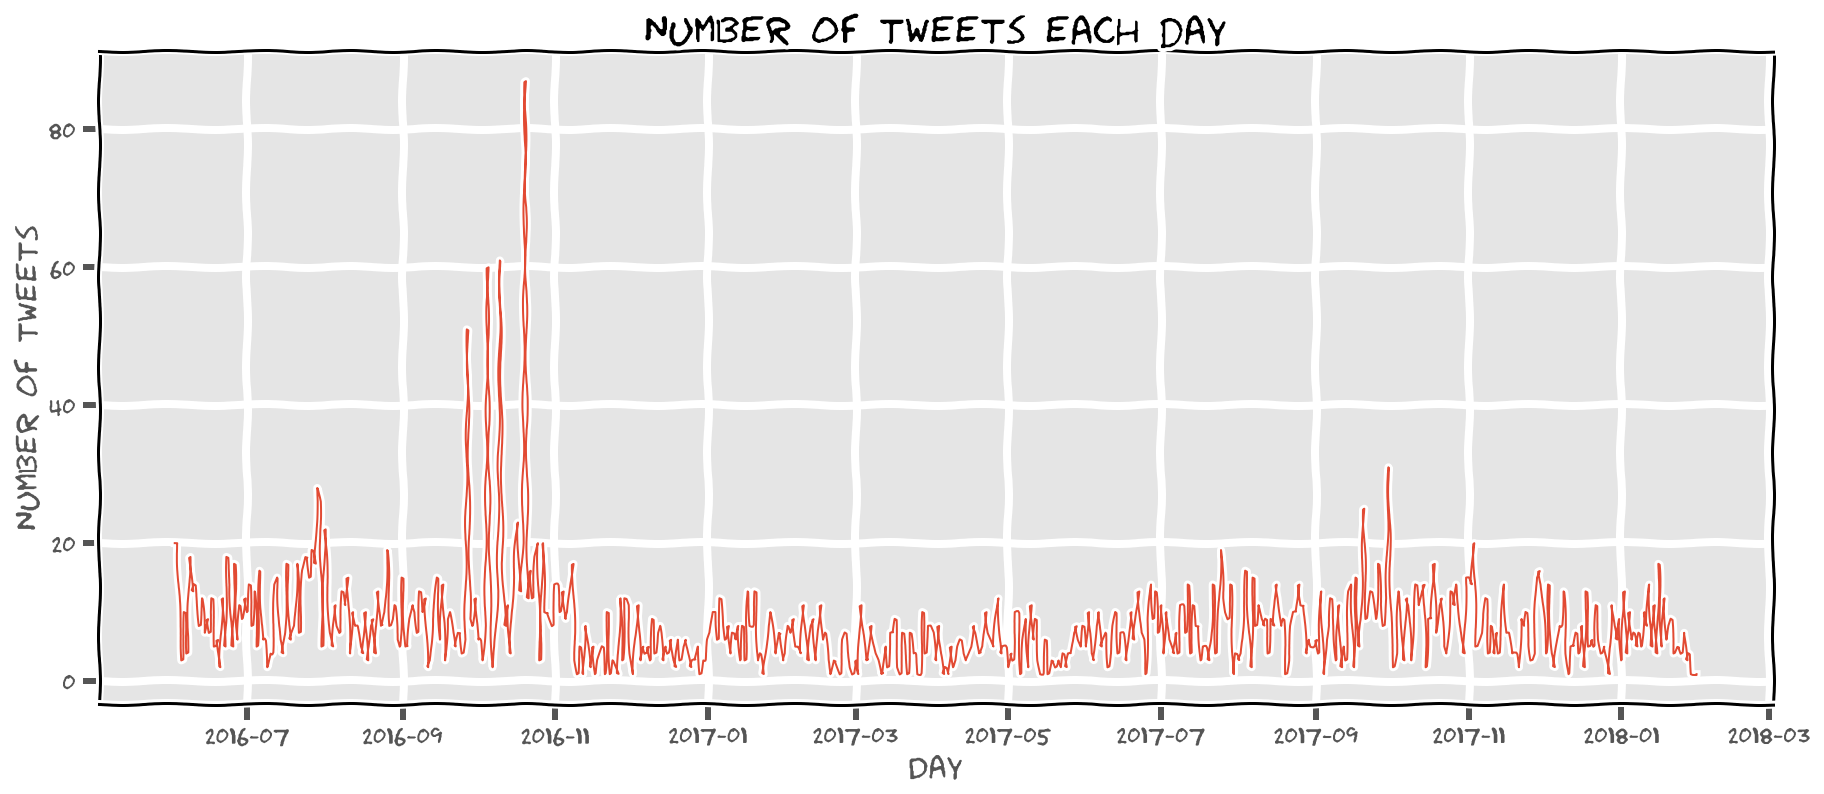

In [142]:
# Time series num tweets written each day

plt.plot([item[0] for item in day_numtweets], [item[1] for item in day_numtweets], lw=1)
plt.grid()
plt.title('Number of tweets each day')
plt.ylabel('Number of tweets')
plt.xlabel('Day')
plt.show();

In [143]:
# Day of max tweeting

max(day_numtweets, key=lambda x: x[1])

(datetime.date(2016, 10, 20), 87)

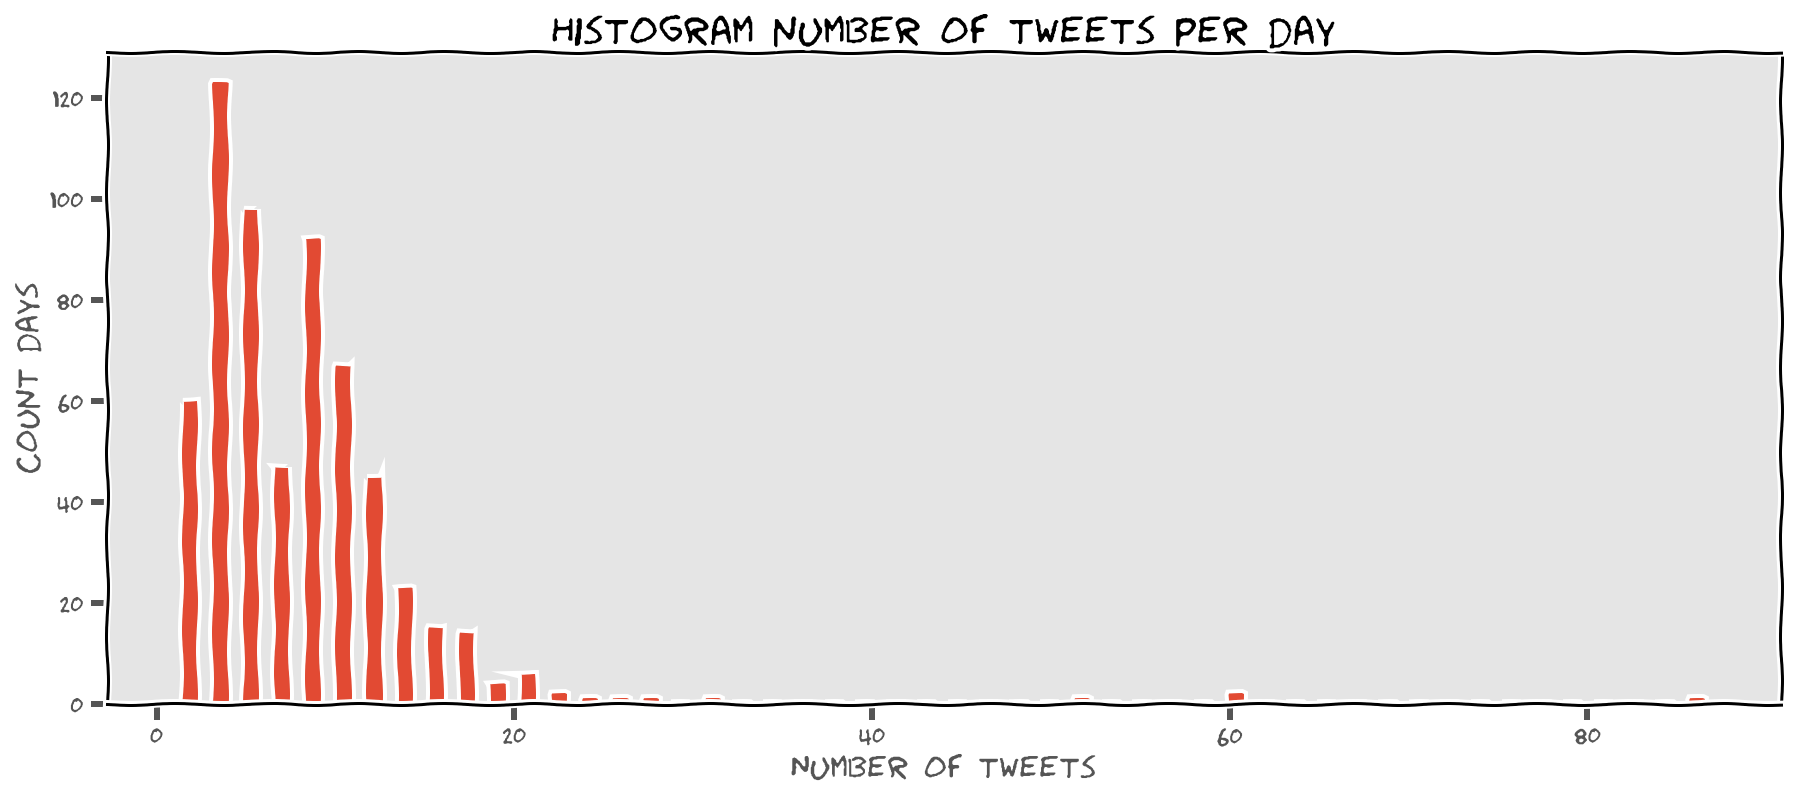

In [144]:
# Histogram of num tweets per day
hist = return_plottable_hist([item[1] for item in day_numtweets], bins=50)

plt.bar([i for i in hist[0]], hist[1])
plt.title('Histogram number of tweets per day')
plt.xlabel('Number of tweets')
plt.ylabel('Count days')
plt.show();

In [145]:
# test stats of this^ distrib

counts = [item[1] for item in day_numtweets]
np.mean(counts), np.std(counts), np.median(counts)

(7.9983443708609272, 6.6783973104612153, 7.0)

## Preferred tweeting time (UTC value)

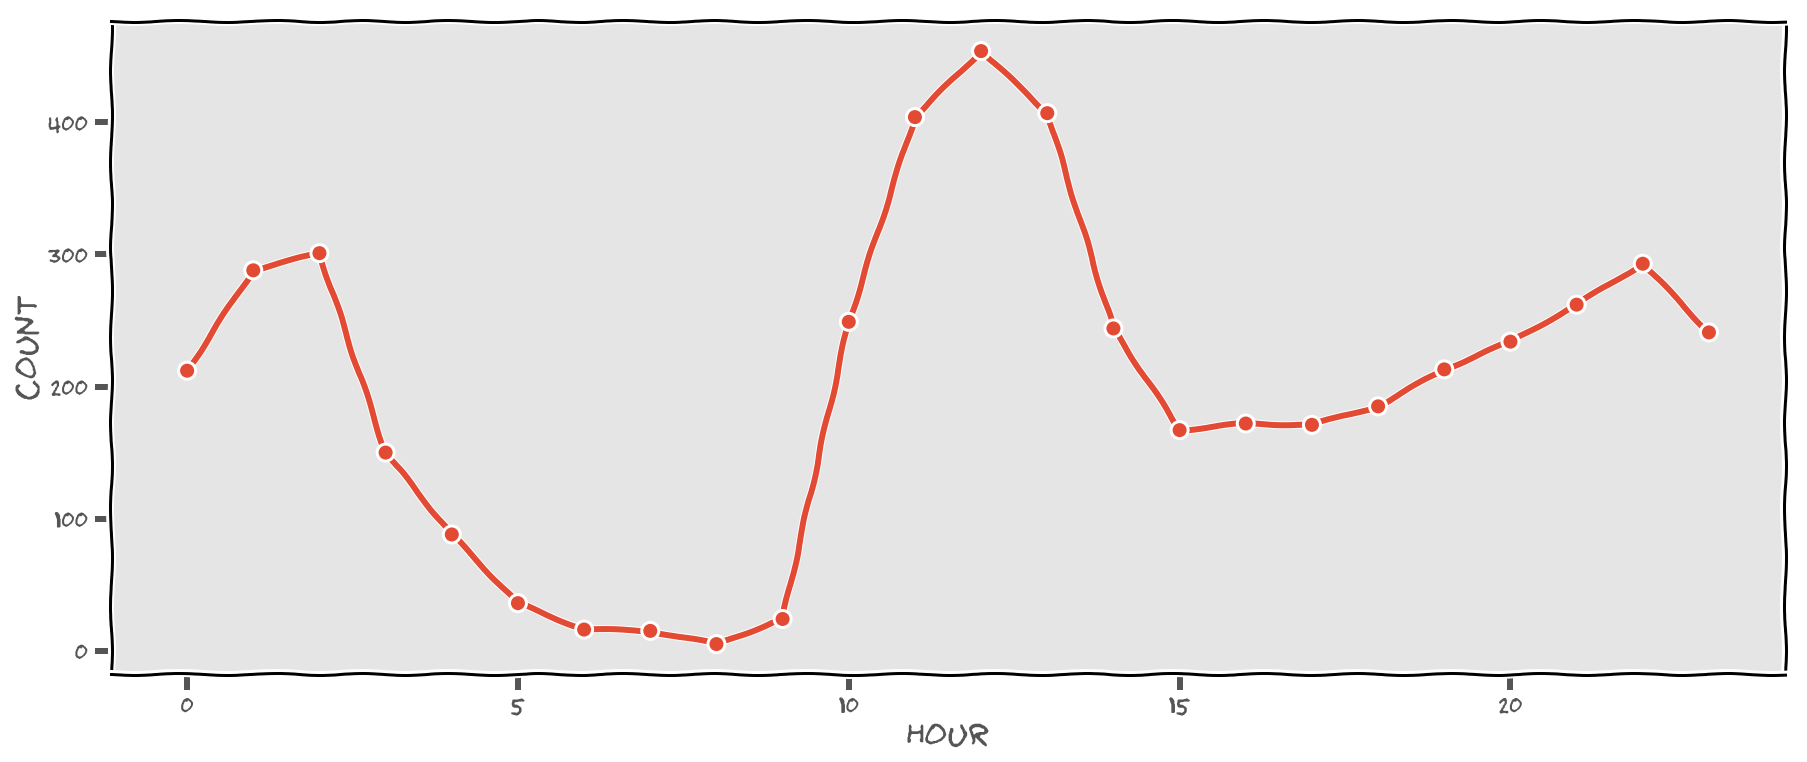

In [147]:
plt.plot([item[0] for item in hour_numtweets], [item[1] for item in hour_numtweets], marker='o')
plt.xlabel('Hour')
plt.ylabel('Count')
plt.show();

## Likes per tweet

In [148]:
fav_counts = [tweet['favorite_count'] for tweet in t.tweets]

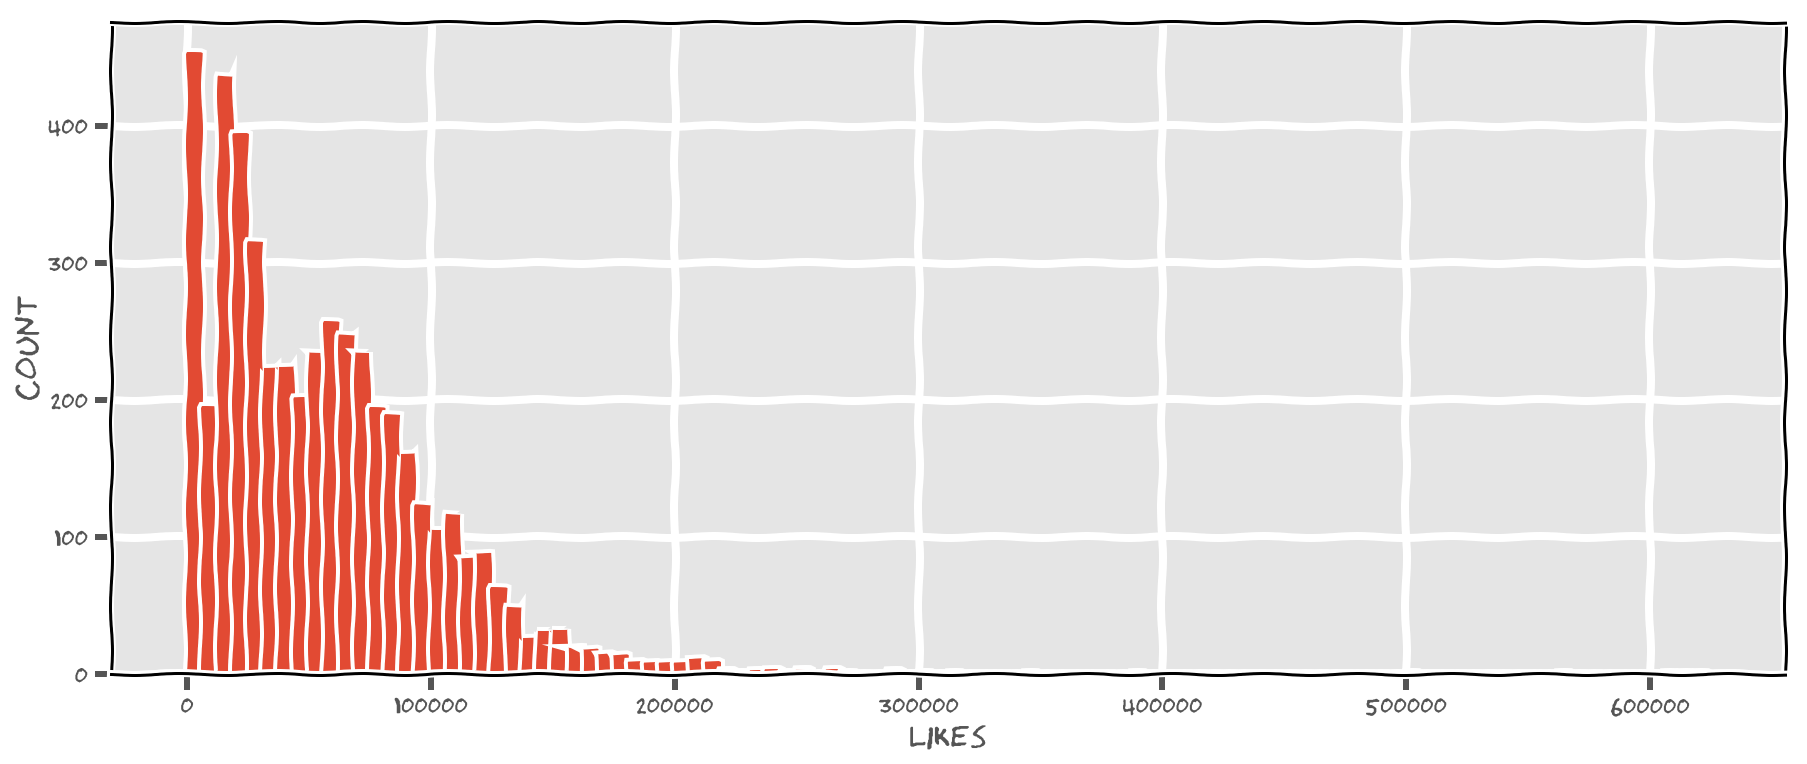

In [149]:
plt.hist(fav_counts, bins=100)
plt.grid()
plt.xlabel('Likes')
plt.ylabel('Count')
plt.show();

In [150]:
np.mean(fav_counts), np.std(fav_counts), np.median(fav_counts)

(56656.342993169113, 48034.215518066616, 49158.0)

## Entities

In [151]:
entities_data = t.count_entities()

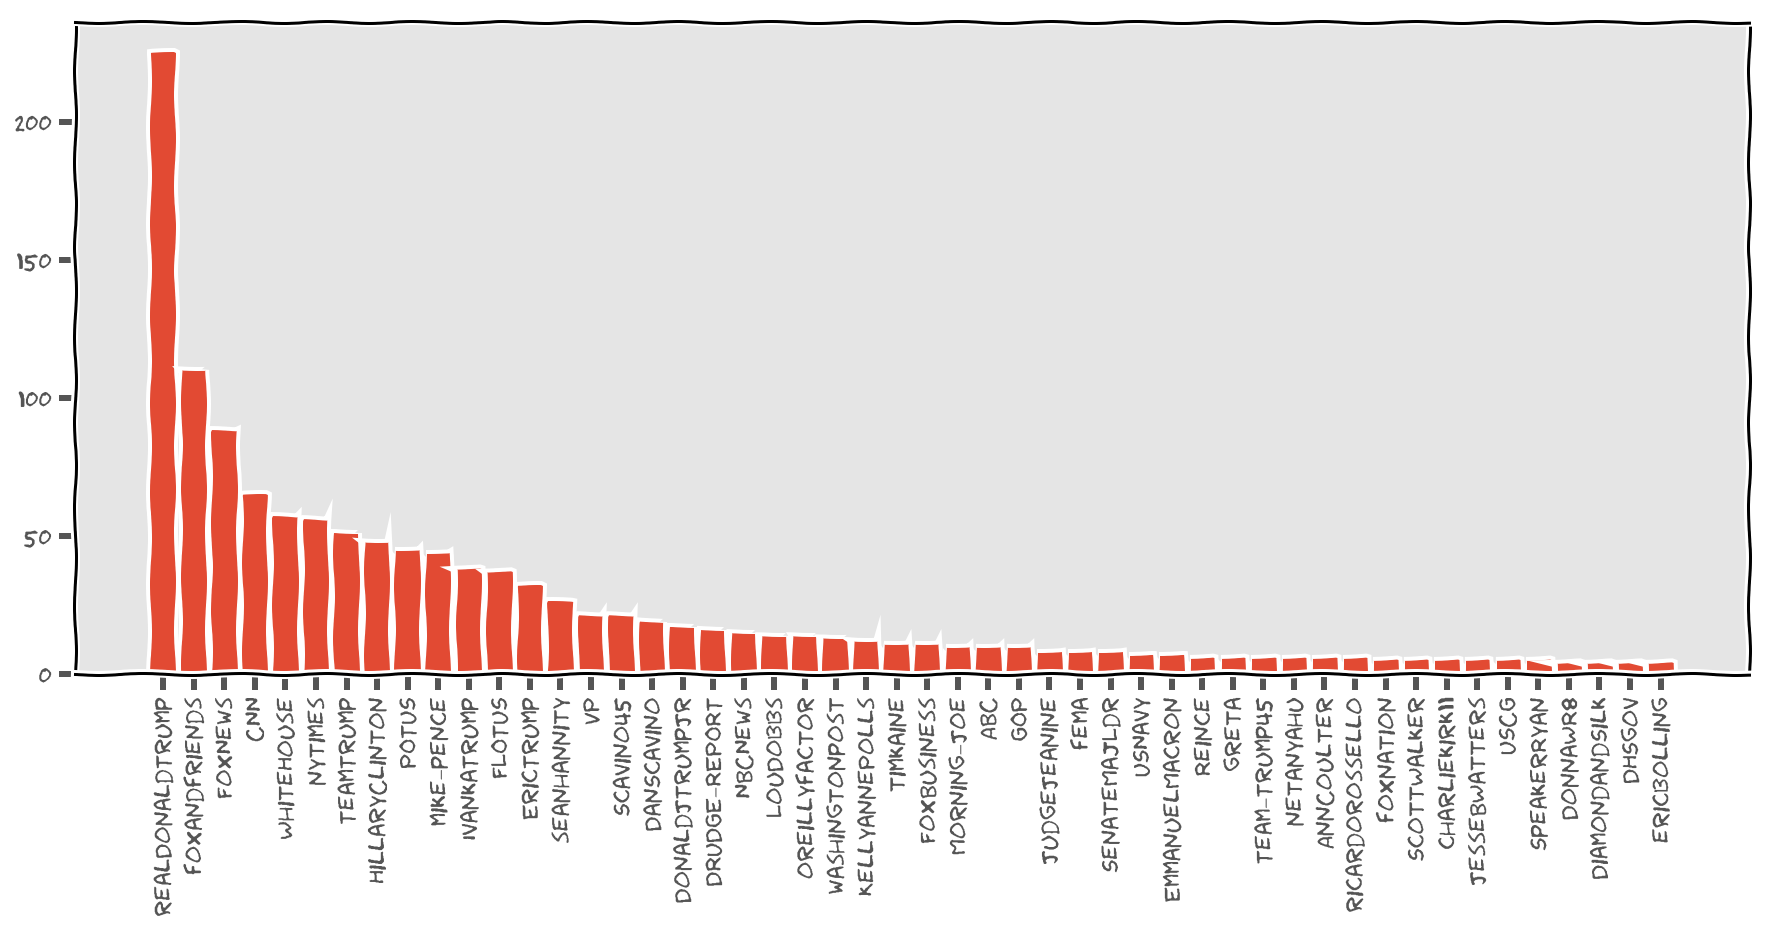

In [152]:
# Bar plot 50 highest populated mentions

m = entities_data['mentions_counts'][:50]

plt.bar(range(len(m)), [item[1] for item in m])
plt.xticks(range(len(m)), [item[0] for item in m], rotation=90)
plt.show();

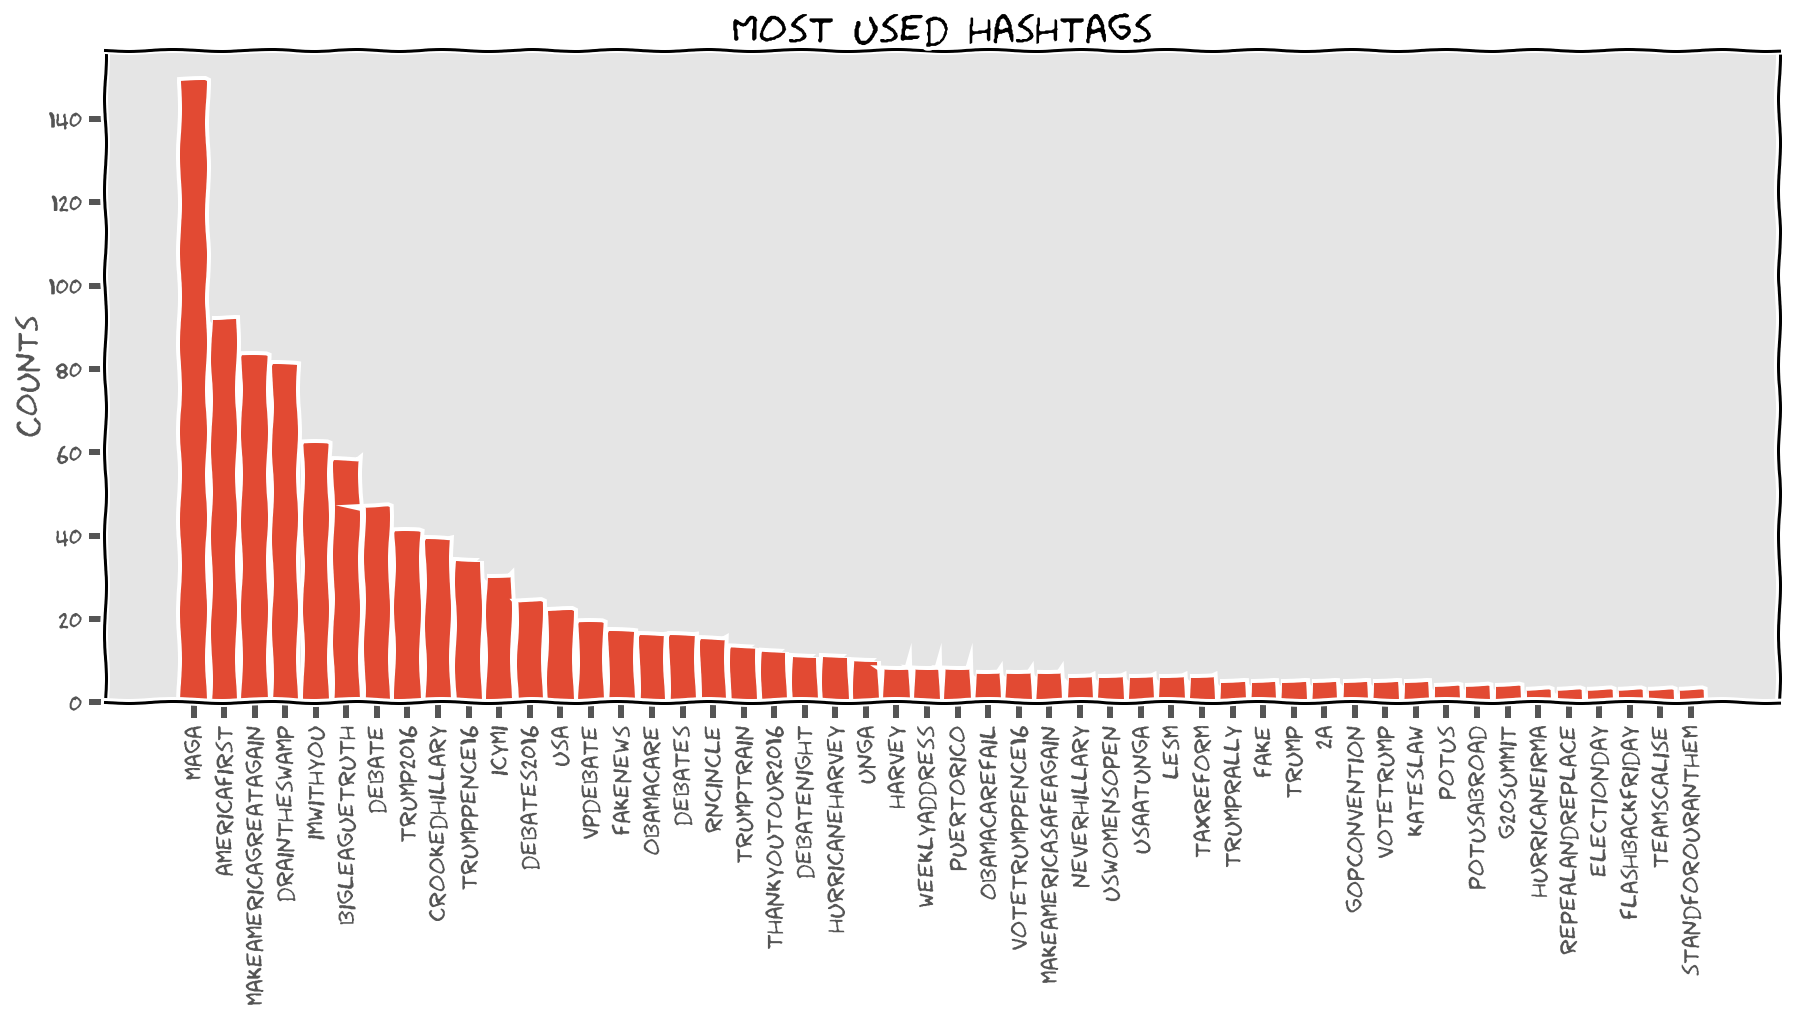

In [153]:
# Bar plot 50 highest populated hashtags

m = entities_data['hashtags_counts'][:50]

plt.bar(range(len(m)), [item[1] for item in m])
plt.xticks(range(len(m)), [item[0] for item in m], rotation=90)
plt.title('Most used hashtags')
plt.ylabel('Counts')
plt.savefig('hashtags.pdf')
plt.show();

## Word frequencies

In [154]:
i = t.extract_information()

## The corpus of text

In [62]:
t.corpus

Corpus(4831 docs; 108768 tokens)

In [156]:
import operator

sorted(t.corpus.word_doc_freqs(as_strings=True).items(), key=operator.itemgetter(1), reverse=True)[:50]

[(u'-PRON-', 3193),
 (u'great', 737),
 (u'thank', 516),
 (u'rt', 450),
 (u'hillary', 385),
 (u'people', 328),
 (u'trump', 325),
 (u"'s", 310),
 (u'clinton', 302),
 (u'america', 285),
 (u'president', 260),
 (u'today', 257),
 (u'big', 236),
 (u'country', 233),
 (u'news', 220),
 (u'@realdonaldtrump', 212),
 (u'job', 209),
 (u'crooked', 206),
 (u'time', 202),
 (u'join', 197),
 (u'year', 196),
 (u'new', 192),
 (u'good', 184),
 (u'vote', 176),
 (u'fake', 175),
 (u'tax', 174),
 (u'work', 173),
 (u'u.s.', 172),
 (u'bad', 168),
 (u'look', 160),
 (u'want', 158),
 (u'day', 155),
 (u'win', 147),
 (u'american', 146),
 (u'watch', 146),
 (u'state', 143),
 (u'maga', 134),
 (u'election', 127),
 (u'obama', 124),
 (u'honor', 123),
 (u'come', 118),
 (u'like', 115),
 (u'medium', 114),
 (u'democrats', 114),
 (u'obamacare', 108),
 (u'know', 107),
 (u'debate', 104),
 (u'support', 102),
 (u'north', 100),
 (u'cut', 100)]

In [45]:
# f_out = open('texts.txt', 'w')

# for doc in t.corpus:
    
#     f_out.write(str(doc.text.encode('utf-8')))
#     f_out.write('\n')
    
# f_out.close()

In [157]:
!head texts.txt

Getting rdy to leave for France @ the invitation of President Macron to celebrate & honor Bastille Day and 100yrs since U.S. entry into WWI.
Thank you to Donald Rumsfeld for the endorsement. Very much appreciated. Clinton's conduct has been "disqualifying."
'Trump Helps Lift Small Business Confidence to 12-Yr. High'
https://t.co/MhbABREhzt https://t.co/CWAvJ4fRdx
The @WashingtonPost quickly put together a hit job book on me- comprised of copies of some of their inaccurate stories. Don't buy, boring!
I will be going to Puerto Rico on Tuesday with Melania. Will hopefully be able to stop at the U.S. Virgin Islands (people working hard).
RT @realDonaldTrump: Unemployment is down to 4.1%, lowest in 17 years. 1.5 million new jobs created since I took office. Highest stock Mark…
"@DiamondandSilk: Crooked Hillary getting desperate. On TV bashing Trump. @CNN, she forgot how she said a KKK member was her mentor.
"Consumer Comfort Reaches 16-Year High on U.S. Economic Optimism" via Bloomberg http

In [166]:
import gensim

stoplist = set('when are if you your we should by it who very up just so about but many much her him would with no or for a of the and to in he she not they them is have be that this those these was has what been as i'.split())

sentences = []
with open('texts.txt') as f:

        for line in f:
            
            tokens = list(gensim.utils.tokenize(line, lowercase=True))
            
            sentences.append([t for t in tokens if t not in stoplist])

In [167]:
model = gensim.models.Word2Vec(sentences, workers=4, min_count=10)

In [174]:
model.most_similar('hillary')

[(u'crooked', 0.9984585642814636),
 (u'clinton', 0.9970616698265076),
 (u'bad', 0.9959401488304138),
 (u'media', 0.9956238865852356),
 (u'obama', 0.9951672554016113),
 (u'said', 0.9946250319480896),
 (u'than', 0.9944300651550293),
 (u'made', 0.9942096471786499),
 (u'election', 0.9940739870071411),
 (u'only', 0.9940322637557983)]

In [169]:
model.most_similar('america')

[(u'again', 0.9986943006515503),
 (u'make', 0.9973799586296082),
 (u'safe', 0.9956441521644592),
 (u'together', 0.992652416229248),
 (u'great', 0.9905946850776672),
 (u'lets', 0.9860274791717529),
 (u'trumppence', 0.9860225915908813),
 (u'once', 0.9847156405448914),
 (u'honor', 0.9840437173843384),
 (u'thank', 0.9838368892669678)]

In [170]:
model.most_similar(positive='people')

[(u'their', 0.9996722340583801),
 (u'big', 0.9996369481086731),
 (u'only', 0.9996130466461182),
 (u'there', 0.9996035099029541),
 (u'healthcare', 0.9995920658111572),
 (u'made', 0.9995540976524353),
 (u'my', 0.9995525479316711),
 (u'never', 0.9995091557502747),
 (u'country', 0.9994744062423706),
 (u'will', 0.9994736313819885)]